예측 결과 : [1. 0. 0. 0. 1. 0. 1. 0. 0. 1.]


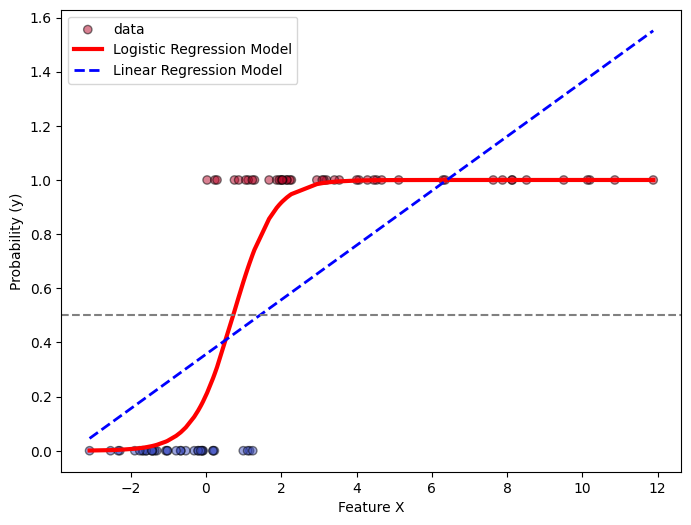

In [1]:
import warnings
warnings.filterwarnings(action='ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression  
from sklearn.model_selection import train_test_split

# 데이터를 생성하고 반환하는 함수입니다.
def load_data():
    np.random.seed(0)
    
    X = np.random.normal(size = 100)
    y = (X > 0).astype(float)
    X[X > 0] *= 5
    X += .7 * np.random.normal(size = 100)
    X = X[:, np.newaxis]
    
    train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.2, random_state = 100)
    
    return train_X, test_X, train_y, test_y
"""
1. 로지스틱 회귀 모델을 구현하고, 
   학습 결과를 확인할 수 있는 main() 함수를 완성합니다. 
"""
def plot_logistic_regression(logistic_model, linear_model, X, y):
    plt.figure(figsize=(8, 6))

    X_sorted = np.sort(X, axis=0)
    y_pred_prob = logistic_model.predict_proba(X_sorted)[:, 1]
    y_linear_pred = linear_model.predict(X_sorted)
    
    plt.scatter(X.ravel(), y, c=y, cmap="coolwarm", edgecolors="k", alpha=0.5, label="data")

    plt.plot(X_sorted, y_pred_prob, color="red", linewidth=3, label="Logistic Regression Model")

    plt.plot(X_sorted, y_linear_pred, color="blue", linestyle="--", linewidth=2, label="Linear Regression Model")

    plt.axhline(0.5, color="gray", linestyle="--")
    plt.xlabel("Feature X")
    plt.ylabel("Probability (y)")
    plt.legend()
    plt.show()

def main():
    train_X, test_X, train_y, test_y = load_data()
    
    logistic_model = LogisticRegression()    
    logistic_model.fit(train_X, train_y)

    linear_model = LinearRegression()
    linear_model.fit(train_X, train_y)
    
    predicted = logistic_model.predict(test_X)
    
    # 예측 결과 확인하기 
    print("예측 결과 :", predicted[:10])
    
    plot_logistic_regression(logistic_model, linear_model, train_X, train_y)
    
    return logistic_model

if __name__ == "__main__":
    main()